# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *K*

**Names:**

* *Robin Lang*
* *Kim Lan Phan Hoang*
* *Julien Harbulot*

---

#### Instructions

*This is a template for part 3 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

In [3]:
import epidemics_helper
import json
import numpy as np
import random

import matplotlib.pyplot as plt
%matplotlib inline

import networkx as nx
from networkx.readwrite import json_graph

import operator
import math

In [4]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['image.interpolation'] = 'nearest'

---

# 2.3 Epdemics

### Exercise 2.9: Simulate an epidemic outbreak

In [16]:
# open the file and store it in a veriable
file = open("../data/nyc_augmented_network.json")
file_json = json.load(file)
# create the graph
G = json_graph.node_link_graph(file_json)

$1.$ **The first infection was observed at node
23654
. Simulate the Plague epidemic with the
aforementioned parameters for 100 days.**

In [17]:
# launch the epidemic for this initial exercise
sir = epidemics_helper.SimulationSIR(G, beta=10.0, gamma=0.1)
sir.launch_epidemic(source=23654, max_time=100.0)

# the number of nodes in this graph
num_nodes = nx.number_of_nodes(G)

Epidemic stopped after 100.10 days | 100.10 days elapsed | 0.1% susceptible, 0.0% infected, 99.9% recovered


$2.$ **Plot the evolution of the epidemic over time. In particular, plot the percentage of
susceptible, infected and recovered nodes over time.**

In [6]:
# this method computes the number of infected, susceptible and recovered nodes
# given the current time t (in days), the tables containing the infections (inf) and recoveries (rec)
# as well as the number of nodes N
def SIR(t, inf, rec, N):
    I = 0
    S = 0
    R = 0
    
    for i in range(N):
        if inf[i] < t:
            I += 1
        else:
            S += 1
        
        if rec[i] < t:
            I -= 1
            R += 1
    return (S, I, R)

In [5]:
# compute the necessary information for the graph, with a precision of 'graph_points' seperate evaluation points
graph_points = 500

X = np.arange(0, 100, 100/graph_points)
INF = np.zeros(graph_points)
SUSC = np.zeros(graph_points)
REC = np.zeros(graph_points)
for i in range(graph_points):
    curr = SIR(X[i], sir.inf_time, sir.rec_time, num_nodes)
    
    SUSC[i] = curr[0]
    INF[i] = curr[1]
    REC[i] = curr[2]

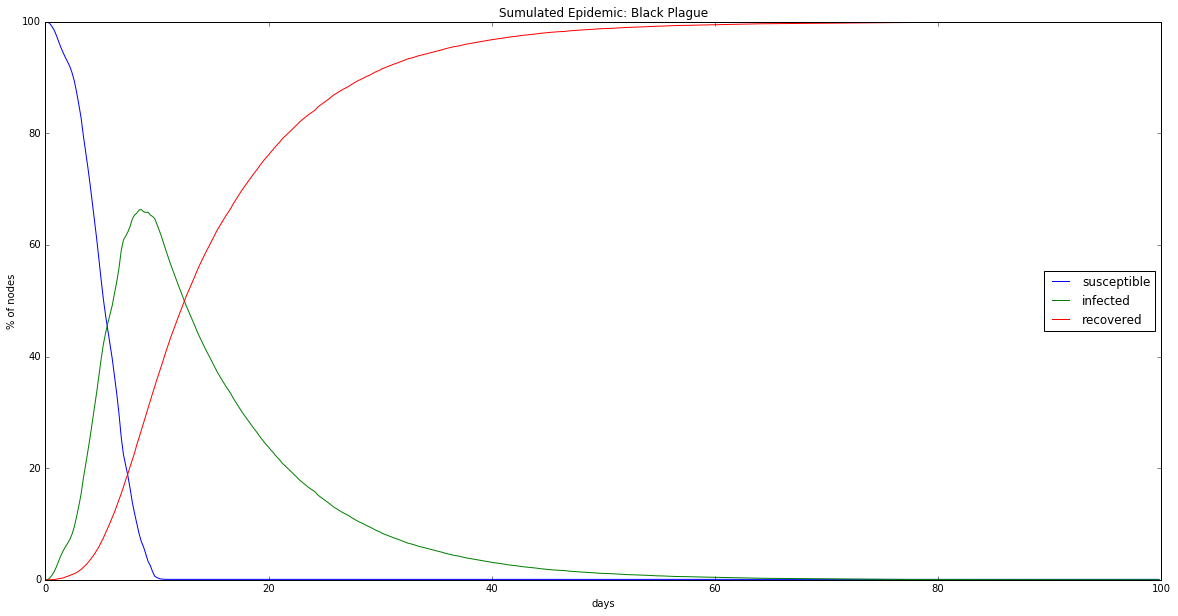

In [6]:
# plot the data points onto the same graph
plt.plot(X, SUSC/num_nodes*100, label="susceptible")
plt.plot(X, INF/num_nodes*100, label="infected")
plt.plot(X, REC/num_nodes*100, label="recovered")
plt.legend(loc='center right', frameon=True)
plt.xlabel("days")
plt.ylabel("% of nodes")
plt.title("Sumulated Epidemic: Black Plague")
plt.show()

$3.$ **How long does it take before 60% of the population is infected? dead?**

60% are infected after about 7 days. <br>
60% are dead after about 15 days.

In [7]:
# compute how many days it would take until p % are infected
# given the number of evaluation points pts, the number of nodes N
# and the pre-computed table containing the infections inf
def find_min_infected(p, pts, N, inf):
    index = 0
    while (index < pts-1) & (inf[index]/N < p/100):
        index += 1

    if (inf[index]/N < p/100):
        print(p, "% are never infected")
    else:
        print(p, "% are infected after", index*100/pts, "days")

# compute how many days it would take until p % are infected
# given the number of evaluation points pts, the number of nodes N
# and the pre-computed table containing the recoveries rec
def find_min_dead(p, pts, N, rec):
    index = 0
    while (index < pts-1) & (rec[index]/N < p/100):
        index += 1

    if (rec[index]/N < p/100):
        print(p, "% are never dead")
    else:
        print(p, "% are dead after", index*100/pts, "days")

In [8]:
find_min_infected(60, graph_points, num_nodes, INF)
find_min_dead(60, graph_points, num_nodes, REC)

60 % are infected after 7.0 days
60 % are dead after 14.8 days


$4.$ **How does the graph look like
after 1 day? 3 days? 30 days?**

We use blue, green and red for susceptible, infected and recovered respectively.<br>
We can see that after the first day, some nodes are already infected. After three days the pandemic expands even more and touches the other "islands" of the graph. After 30 days, most of the graph is recovered (either dead or healed).

In [9]:
def draw_SIR(d, inf, rec, N):
    print("after", d, "days:")
        
    # Initialize data structures
    nodes = file_json['nodes']
    pos = []
    susceptible = []
    infected = []
    recovered = []

    # Collect the labels and assign the nodes to susceptible, infected, recovered
    for n in range(N):
        coord = nodes[n]['coordinates']
        pos.append((coord[0], coord[1]))
        if (inf[n] > d):
            susceptible.append(n)
        elif (rec[n] < d):
            recovered.append(n)
        else:
            infected.append(n)

    # Draw the network
    # we do not draw the edges to make the network look cleaner and for it to be easier to see the nodes
    susc_nodes = nx.draw_networkx_nodes(G, pos, nodelist=susceptible, node_color='b', node_size=5)
    susc_nodes.set_edgecolor('b')

    inf_nodes = nx.draw_networkx_nodes(G, pos, nodelist=infected, node_color='g', node_size=5)
    inf_nodes.set_edgecolor('g')

    rec_nodes = nx.draw_networkx_nodes(G, pos, nodelist=recovered, node_color='r', node_size=5)
    rec_nodes.set_edgecolor('r')
    
    plt.axis('off');


after 1 days:


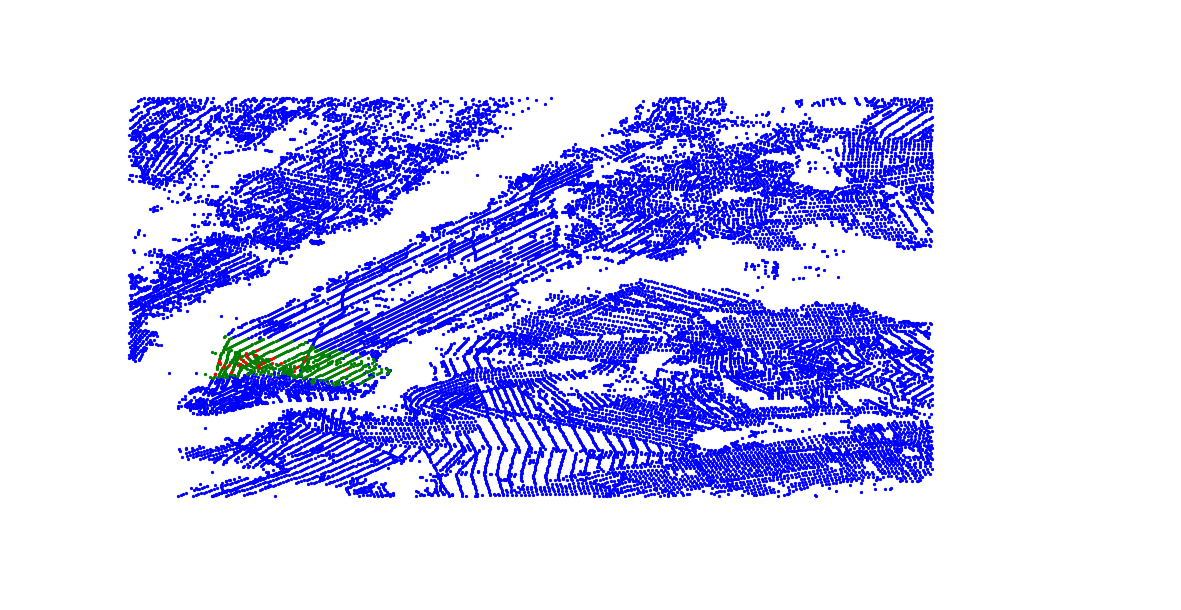

In [10]:
# draw the network after 1 day
draw_SIR(1, sir.inf_time, sir.rec_time, num_nodes)

after 3 days:


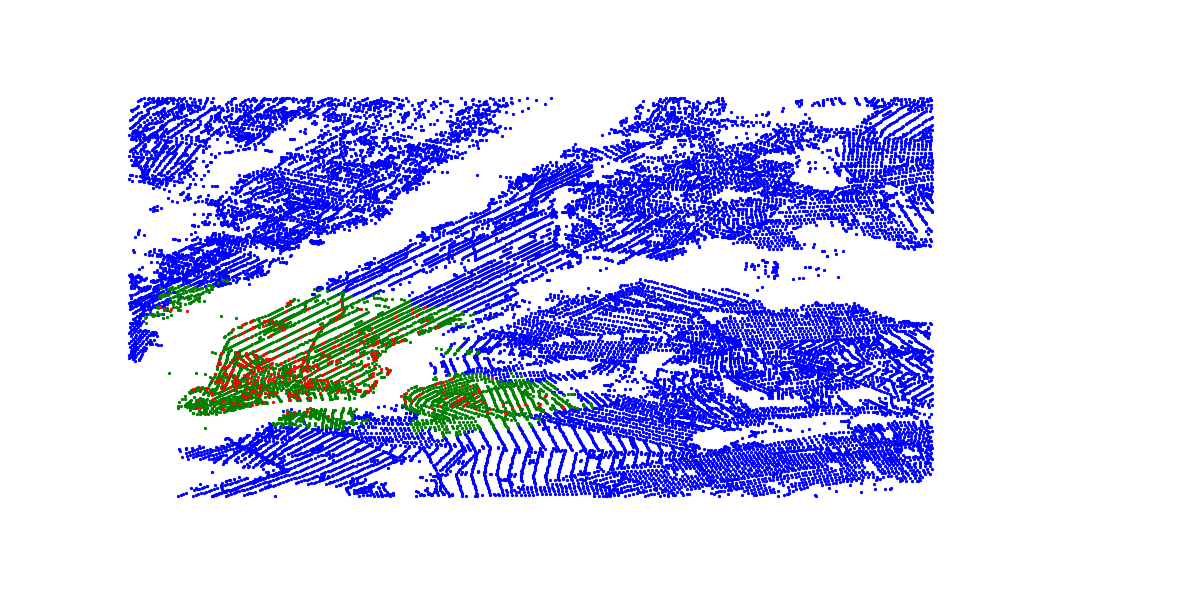

In [11]:
# draw the network after 3 days
draw_SIR(3, sir.inf_time, sir.rec_time, num_nodes)

after 30 days:


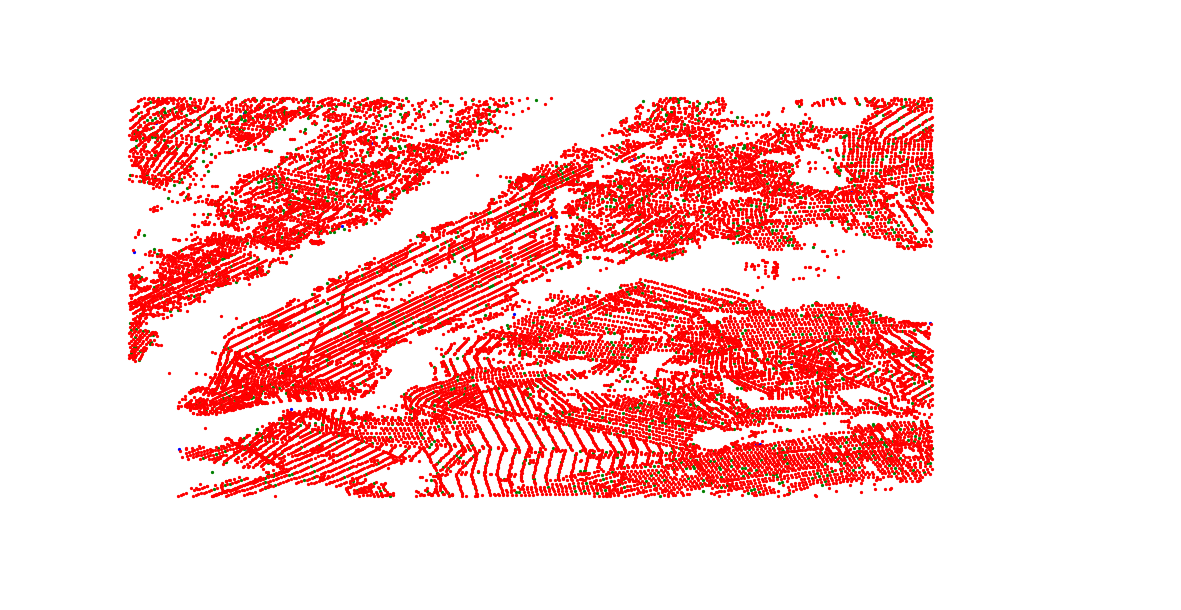

In [12]:
# draw the network after 30 days
draw_SIR(30, sir.inf_time, sir.rec_time, num_nodes)

---

## 2.3.1 Stop the apocalypse!

### Exercise 2.10: Strategy 1

In [9]:
#compute the average of number of a given array l
def average(l):
    return sum(l) / float(len(l))

In [19]:
# strategy1 simulate numberRuns time the pandemic if we remove random edges from the graph
# and return three arrays containing the numbers of nodes being susceptible, infected, recovered
# respectively after a given number of days
def strategy1(numberRuns, numberEdgesToRemove, days):
    
    rec = []
    inf = []
    sus = []

    nG = json_graph.node_link_graph(file_json)
    
    # remove random edges
    randomEdges = random.sample(nG.edges(), numberEdgesToRemove) #sample of 1000 edges to remove
    nG.remove_edges_from(randomEdges)

    # simulate the epidemics numberRuns time
    for i in range(numberRuns):
        randomNode = random.choice(nG.nodes())
        sir = epidemics_helper.SimulationSIR(nG, beta=10.0, gamma=0.1)
        sir.launch_epidemic(source=randomNode, max_time=100.0)
        res = SIR(days, sir.inf_time, sir.rec_time, num_nodes)
        rec.append(res[2])
        inf.append(res[1])
        sus.append(res[0])
        
    return(sus, inf, rec)

In [20]:
s,i,r = strategy1(5, 1000, 30)

random node :  13089
Epidemic stopped after 99.42 days | 99.42 days elapsed | 0.6% susceptible, 0.0% infected, 99.4% recovered
random node :  3330
Epidemic stopped after 100.40 days | 100.40 days elapsed | 0.5% susceptible, 0.0% infected, 99.5% recovered
random node :  11893
Epidemic stopped after 101.82 days | 101.82 days elapsed | 0.4% susceptible, 0.0% infected, 99.5% recovered
random node :  4123
Epidemic stopped after 104.39 days | 104.39 days elapsed | 0.5% susceptible, 0.0% infected, 99.5% recovered
random node :  13395
Epidemic stopped after 101.11 days | 101.11 days elapsed | 0.5% susceptible, 0.0% infected, 99.5% recovered


**Is this strategy effective?**

It is effective since it decreases the number of susceptible nodes, however we can do better.

**On average, how many people are healthy, infected, dead after 30 days?**

In [21]:
print("Average people being susceptible without 1000 random edges after 30 days : ",average(s))
print("Average people being infected without 1000 random edges after 30 days : ",average(i))
print("Average people being recovered without 1000 random edges after 30 days : ",average(r))

Average of people being susceptible without 1000 random edges after 30 days :  134.8
Average of people being infected without 1000 random edges after 30 days :  2637.8
Average of people being recovered without 1000 random edges after 30 days :  23708.4


**What happens if you increase the budget (
e.g.
to 10000 edges)?**

Deleting more edges leads to decrease the possibility for the pandemic to expand. We can see that there is way more susceptible nodes and way less recovered nodes after deleting 10000 edges.

In [16]:
s1,i1,r1 = strategy1(5, 10000, 30)
print("------------------------------------------------------------------------------------")
print("Average people being susceptible without 10000 random edges after 30 days : ",average(s1))
print("Average people being infected without 10000 random edges after 30 days : ",average(i1))
print("Average people being recovered without 10000 random edges after 30 days : ",average(r1))

random node :  25805
Epidemic stopped after 99.63 days | 99.63 days elapsed | 23.9% susceptible, 0.0% infected, 76.1% recovered
random node :  11417
Epidemic stopped after 116.11 days | 116.11 days elapsed | 12.9% susceptible, 0.0% infected, 87.1% recovered
random node :  26043
Epidemic stopped after 102.89 days | 102.89 days elapsed | 13.1% susceptible, 0.0% infected, 86.9% recovered
random node :  22003
Epidemic stopped after 105.38 days | 105.38 days elapsed | 12.9% susceptible, 0.0% infected, 87.1% recovered
random node :  10860
Epidemic stopped after 100.89 days | 100.89 days elapsed | 24.0% susceptible, 0.0% infected, 76.0% recovered
------------------------------------------------------------------------------------
Average people susceptible without 10000 random edges after 30 days :  4594.0
Average people infected without 10000 random edges after 30 days :  3538.8
Average people recovered without 10000 random edges after 30 days :  18348.2


### Exercise 2.11: Strategy 2

**Explain your strategy.**

The best strategy would be to cut bridges between the three "islands" of the graph (which we can see from the visualization above). However it is too long to look for them. Instead we tried to divide our graph into connected components, so that the pandemic is constrained only in a part of the graph. We did this by deleting edges which are formed a shortest path between nodes whose degree is high. This works because these high degree nodes are far from each other and thus offer a nice slicing of the graph. 

In [13]:
# delete shortest path between high degree nodes and return three arrays containing the numbers of nodes 
# being susceptible, infected, recovered respectively after a given number of days
def strategy2(numberRuns, numberEdgesToRemove, days):
    
    rec = []
    inf = []
    sus = []
    
    G = json_graph.node_link_graph(file_json)
    
    # sort nodes depending on their degree
    degree_sequence=nx.degree(G) # degree sequence
    s = sorted(degree_sequence.items(), key=operator.itemgetter(1)) 
    
    # remove shortest path between high degree nodes
    count = 0
    while (numberEdgesToRemove > 0):
        source = s[-count][0]
        target = s[-count-1][0]
        
        if(nx.has_path(G,source=source,target=target)): 
            toRemove = (nx.shortest_path(G,source=source,target=target))
            numberEdgesToRemove -= len(toRemove)
            
            # if the path is longer than the remaining removable edges, we only delete the first ones 
            if(numberEdgesToRemove < 0) :
                toRemove = toRemove[:(-numberEdgesToRemove)]
            else :
                i=0
                while ((i+1 < len(toRemove))):
                    G.remove_edge(toRemove[i],toRemove[i+1])
                    i+=1
        count+=2

    # simulate the pandemic numberRuns times
    for i in range(numberRuns):
        randomNode = random.choice(G.nodes())
        sir = epidemics_helper.SimulationSIR(G, beta=10.0, gamma=0.1)
        sir.launch_epidemic(source=randomNode, max_time=100.0)
        res = SIR(days, sir.inf_time, sir.rec_time, num_nodes)
        sus.append(res[0])
        inf.append(res[1])
        sus.append(res[0])
        
    return(sus, inf, res)

In [15]:
s2,i2,r2 = strategy2(10, 2500, 30)

print("------------------------------------------------------------------------------------")
av = average(s2)
print("Average people being susceptible without 2500 edges after 30 days : ",av, "which is",av*100/nx.number_of_nodes(G),"%")

random node :  20227
Epidemic stopped after 90.85 days | 90.85 days elapsed | 65.7% susceptible, 0.0% infected, 34.3% recovered
random node :  13180
Epidemic stopped after 98.48 days | 98.48 days elapsed | 80.5% susceptible, 0.0% infected, 19.5% recovered
random node :  25567
Epidemic stopped after 109.08 days | 109.08 days elapsed | 56.3% susceptible, 0.0% infected, 43.7% recovered
random node :  20893
Epidemic stopped after 88.92 days | 88.92 days elapsed | 65.7% susceptible, 0.0% infected, 34.3% recovered
random node :  17273
Epidemic stopped after 99.64 days | 99.64 days elapsed | 56.3% susceptible, 0.0% infected, 43.7% recovered
random node :  23325
Epidemic stopped after 104.06 days | 104.06 days elapsed | 65.7% susceptible, 0.0% infected, 34.3% recovered
random node :  20429
Epidemic stopped after 101.47 days | 101.47 days elapsed | 65.7% susceptible, 0.0% infected, 34.3% recovered
random node :  7102
Epidemic stopped after 89.33 days | 89.33 days elapsed | 56.2% susceptible, 0.

**Is your strategy more effective? How does your strategy compare?**

With this method, we obtain an average of people being susceptible between 60% and 70%. It is more effective than the first strategy, and is close to the result of the reference implementation.